## Observations and Insights 

* There is positive correlation between average tumor volume and weight within the subjects

* Campomulin and Ramicane had the highest data points

* Campolumin treament in mouse l509 had a gradual sp

In [342]:

## Observations

In [312]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Combine the data into a single dataset
merged_mouse_data = pd.merge(mouse_metadata, study_results)
merged_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [313]:
# Checking the number of mice.
mice_metadata = len(mouse_metadata['Mouse ID'].unique())
mice_metadata_df = pd.DataFrame({"Total # of Mice": [mice_metadata]})
mice_metadata_df

,Total # of Mice
0,249


In [314]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_mouse_id_count = merged_mouse_data['Mouse ID'].value_counts()
dup_mouse_id_count.head()

dup_mouse_count = pd.DataFrame(merged_mouse_data, columns=['Mouse ID', 'Timepoint'])
dup_mouse_count.head()

duplicate_mouse_id = dup_mouse_count[dup_mouse_count.duplicated()]
duplicate_mouse_id.head(10)

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [315]:
g989trial = merged_mouse_data.loc[study_results["Mouse ID"] == "g989", :]
g989trial.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,n364,Ramicane,Male,4,17,10,40.375138,0
137,m957,Capomulin,Female,3,19,10,46.414518,1
329,j119,Capomulin,Female,7,23,5,45.838998,0
360,g316,Capomulin,Female,22,22,45,40.159220,2
620,b879,Stelasyn,Female,4,26,10,50.338946,1


In [316]:
# # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# # drop_dup_mouse_id = mouse_metadata.loc[mouse_metadata.duplicated(subset=['Mouse ID', 'Timepoint']),['Mouse ID'].unique()
# drop_dup_mouse_id = mouse_metadata.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
# drop_mouse_id_results = study_results.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

# clean_mouse_metadata = mouse_metadata[mouse_metadata['Mouse ID'].isin(drop_dup_mouse_id)==False]
# clean_mouse_id = study_results[study_results['Mouse ID'].isin(drop_mouse_id_results)==False]

# # Merge data using Mouse ID
# combined_data = pd.merge(clean_mouse_metadata, clean_study_results, on = "Mouse ID", how="left")
# combined_data.head()                                       

In [317]:
# Optional: Get all the data for the duplicate mouse ID. 



In [318]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# #remove g989 from both data sets
mouse_data_clean = merged_mouse_data.loc[merged_mouse_data["Mouse ID"] != "g989", :]
mouse_data_clean.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [319]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = len(mouse_data_clean['Mouse ID'].unique())
clean_mouse_count_df = pd.DataFrame({"Total # of Mice": [clean_mouse_count]})
clean_mouse_count_df

,Total # of Mice
0,248


## Summary Statistics

In [320]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
mean = mouse_data_clean.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = mouse_data_clean.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = mouse_data_clean.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
stdv = mouse_data_clean.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem = mouse_data_clean.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]


summary_mouse_data = pd.DataFrame({"Mean": mean,
                                  "Median": median,
                                  "Variance": variance,
                                  "Standard Deviation": stdv,
                                   "SEM": sem})
summary_mouse_data.sort_index()

# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

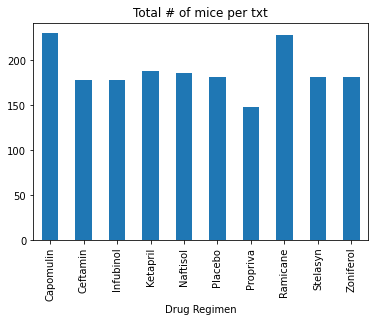

In [321]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
total_mice_per_treatment = mouse_data_clean.groupby('Drug Regimen').count()["Mouse ID"]
total_mice_per_treatment

mouse_bar_plot = total_mice_per_treatment.plot.bar(x="Drug Regimen", y="Mouse ID", rot=90, title="Total # of mice per txt");
plt.savefig('barchart')

In [322]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# plt.figure(figsize=(10,3))
drug_regimen = summary_mouse_data.index.tolist()
drug_regimen

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [323]:
regimen_count = (mouse_data_clean.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
regimen_count

[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

In [324]:
x_axis = np.arange(len(regimen_count))

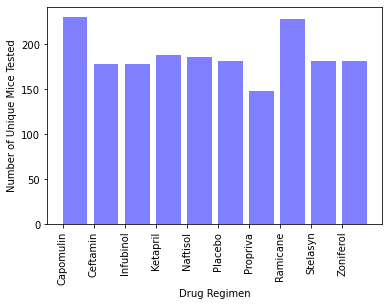

In [325]:
x_axis = drug_regimen

plt.bar(x_axis, regimen_count, color='b', alpha=0.5, align="edge")
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 90) 
plt.ylabel("Number of Unique Mice Tested")
plt.savefig('barchart')
plt.show()

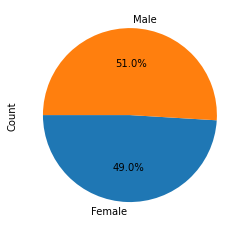

In [326]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = pd.DataFrame(mouse_data_clean.groupby(["Sex"]).count()).reset_index()
gender_count

gender_df = gender_count[["Sex", "Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()

plot = gender_df.plot(kind='pie', y = "Count", autopct='%1.1f%%',
                     startangle=180, shadow=False, labels=gender_df['Sex'], legend = False)
plt.savefig('piechart')

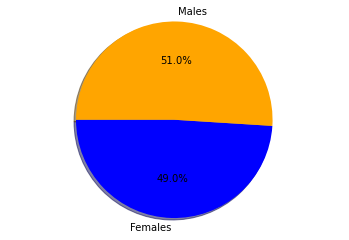

In [327]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Females", "Males"]
sizes = 49.0, 51.0
colors = ["blue", "orange"]
explode = (0,0)

ax1=plt.subplots()
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")
plt.savefig('pltpie')
plt.show()

## Quartiles, Outliers and Boxplots

In [328]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#Seperate the original merged dataframe
drug_list_df = mouse_data_clean[mouse_data_clean['Drug Regimen'].isin(drug_list)]

#view new dataframe
drug_list_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [329]:
#Groupby Mouse ID 
tumor_list = drug_list_df.groupby(['Drug Regimen', "Mouse ID"]).agg(\
        tumor_volume = ('Tumor Volume (mm3)', lambda x: x.iloc[-1])).round(3)

tumor_list

tumor_volume
Drug Regimen Mouse ID              
Capomulin    b128            38.983
             b742            38.940
             f966            30.486
             g288            37.074
             g316            40.159
...                             ...
Ramicane     s508            30.276
             u196            40.668
             w678            43.166
             y449            44.183
             z578            30.639

[100 rows x 1 columns]

In [330]:
last_tumor = tumor_list.stack(level=0).unstack(level=0)
last_tumor.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,tumor_volume,NaN,NaN,67.973,NaN
a251,tumor_volume,NaN,NaN,65.526,NaN
a275,tumor_volume,NaN,62.999,NaN,NaN
a411,tumor_volume,NaN,NaN,NaN,38.408
a444,tumor_volume,NaN,NaN,NaN,43.048


In [331]:
# Put treatments into a list for for loop (and later for plot labels)
counter = 0

for drug in drug_list:
    quartiles = last_tumor[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    if counter == 0:
        print(f"---------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]}")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    counter +=1

---------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.12
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.16
Values below 36.83 for Infubinol could be outliers.
Values a

In [332]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_list = []

for drug in drug_list:
    boxplot_list.append(list(last_tumor[drug].dropna()))

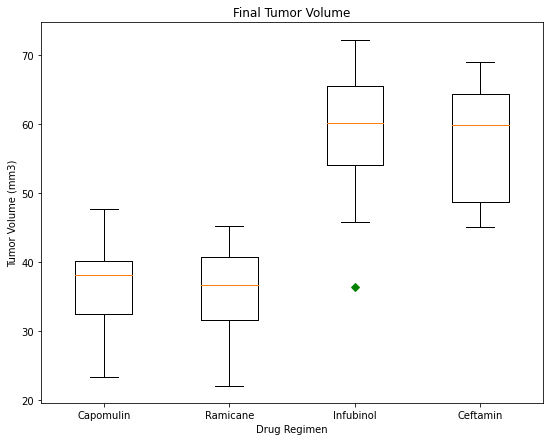

In [333]:
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final Tumor Volume')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(boxplot_list,notch=0,sym='gD')
plt.xticks([1,2,3,4],drug_list)
plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

In [334]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data = mouse_data_clean.loc[mouse_data_clean['Mouse ID'] == 'l509']
capomulin_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2


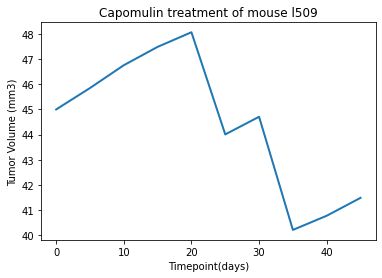

In [343]:
x_axis_timepoint = capomulin_data["Timepoint"]
tumor_vol = capomulin_data["Tumor Volume (mm3)"]

plt.title('Capomulin treatment of mouse l509')
plt.plot(x_axis_timepoint, tumor_vol, linewidth=2, markersize=12)
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.savefig('linechart')
plt.show()

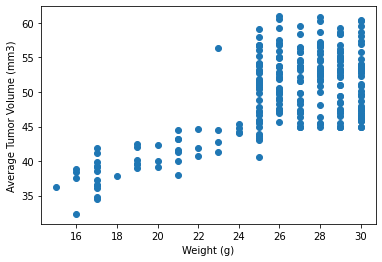

In [336]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avg_tumor_vol = mouse_data_clean.groupby(['Mouse ID']).mean()
plt.scatter(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

In [337]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation=round(st.pearsonr(avg_tumor_vol['Weight (g)'],avg_tumor_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

The correlation between mouse weight and average tumor volume is 0.66


In [338]:
model=st.linregress(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])
model

LinregressResult(slope=1.0967892333689682, intercept=21.010261028552783, rvalue=0.6595577594236609, pvalue=2.4262616144119585e-32, stderr=0.07969309565061991)

In [339]:
mslope = 1.0967892333689682
bintercept = 21.010261028552783

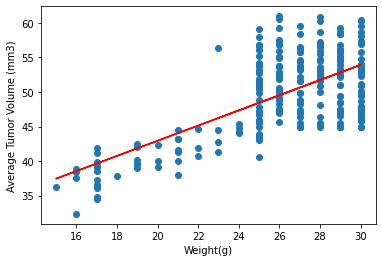

In [340]:
y_values = avg_tumor_vol['Weight (g)']*mslope+bintercept
plt.scatter(avg_tumor_vol['Weight (g)'],avg_tumor_vol['Tumor Volume (mm3)'])
plt.plot(avg_tumor_vol['Weight (g)'], y_values, color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig('linearregression')
plt.show()